In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, Birch, SpectralClustering, DBSCAN
import seaborn as sns
from sklearn.metrics import adjusted_rand_score, davies_bouldin_score
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')


In [36]:
plt.rcParams['figure.figsize'] = (24, 10)
plt.rcParams['font.size'] = 14

In [37]:
df = pd.read_csv("./data/Wine_Quality_Data.csv")
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
6492     11.2        6  white  
6493      9.6        5  white  
6494      9.4        6  white  
6495     12.8        7  white  
6496     11.8        6  white  

[6497 rows x 13 columns]

In [38]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [39]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [40]:
df["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [54]:
quality = []
for i in range(len(df)):
    q = df["quality"][i]
    if q < 5:
        quality.append(4)
    elif q > 6:
        quality.append(7)
    else:
        quality.append(q)
df["quality_new"] = quality
number_clusters = len(set(quality))

In [55]:
feature = df.drop(["quality", "quality_new"], axis=1)


In [56]:
feature_norm = MinMaxScaler(copy=True).fit_transform(feature.drop("color", axis=1))

In [57]:
reducer = PCA(n_components=2)
feature_reduced = reducer.fit_transform(feature_norm)
feature_reduced

array([[ 0.32282704,  0.31472555],
       [ 0.32395659,  0.26589717],
       [ 0.31195923,  0.27056653],
       ...,
       [-0.01258379, -0.14339079],
       [-0.52220324,  0.09975973],
       [-0.16810931,  0.06507449]])

In [58]:
def plot_scatter(embs, labels):
    plt.scatter(embs[:, 0], embs[:, 1], c=labels, s=50, edgecolors="k")
    plt.show()

In [59]:
target = df["quality_new"]

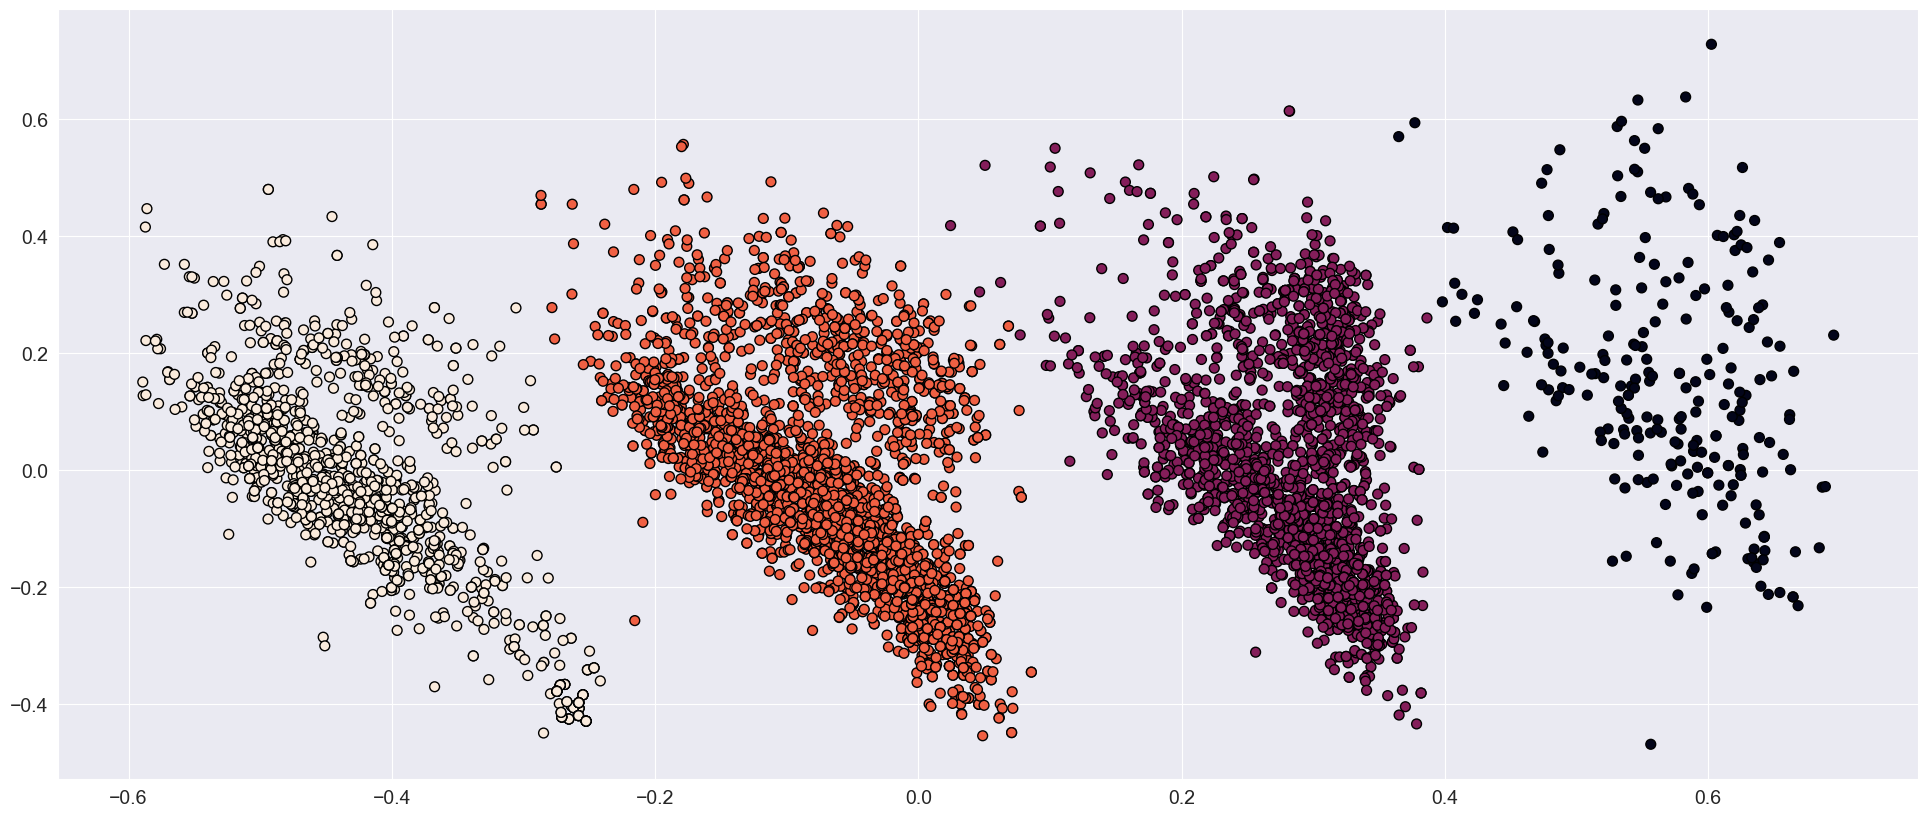

In [60]:
plot_scatter(feature_reduced, target)

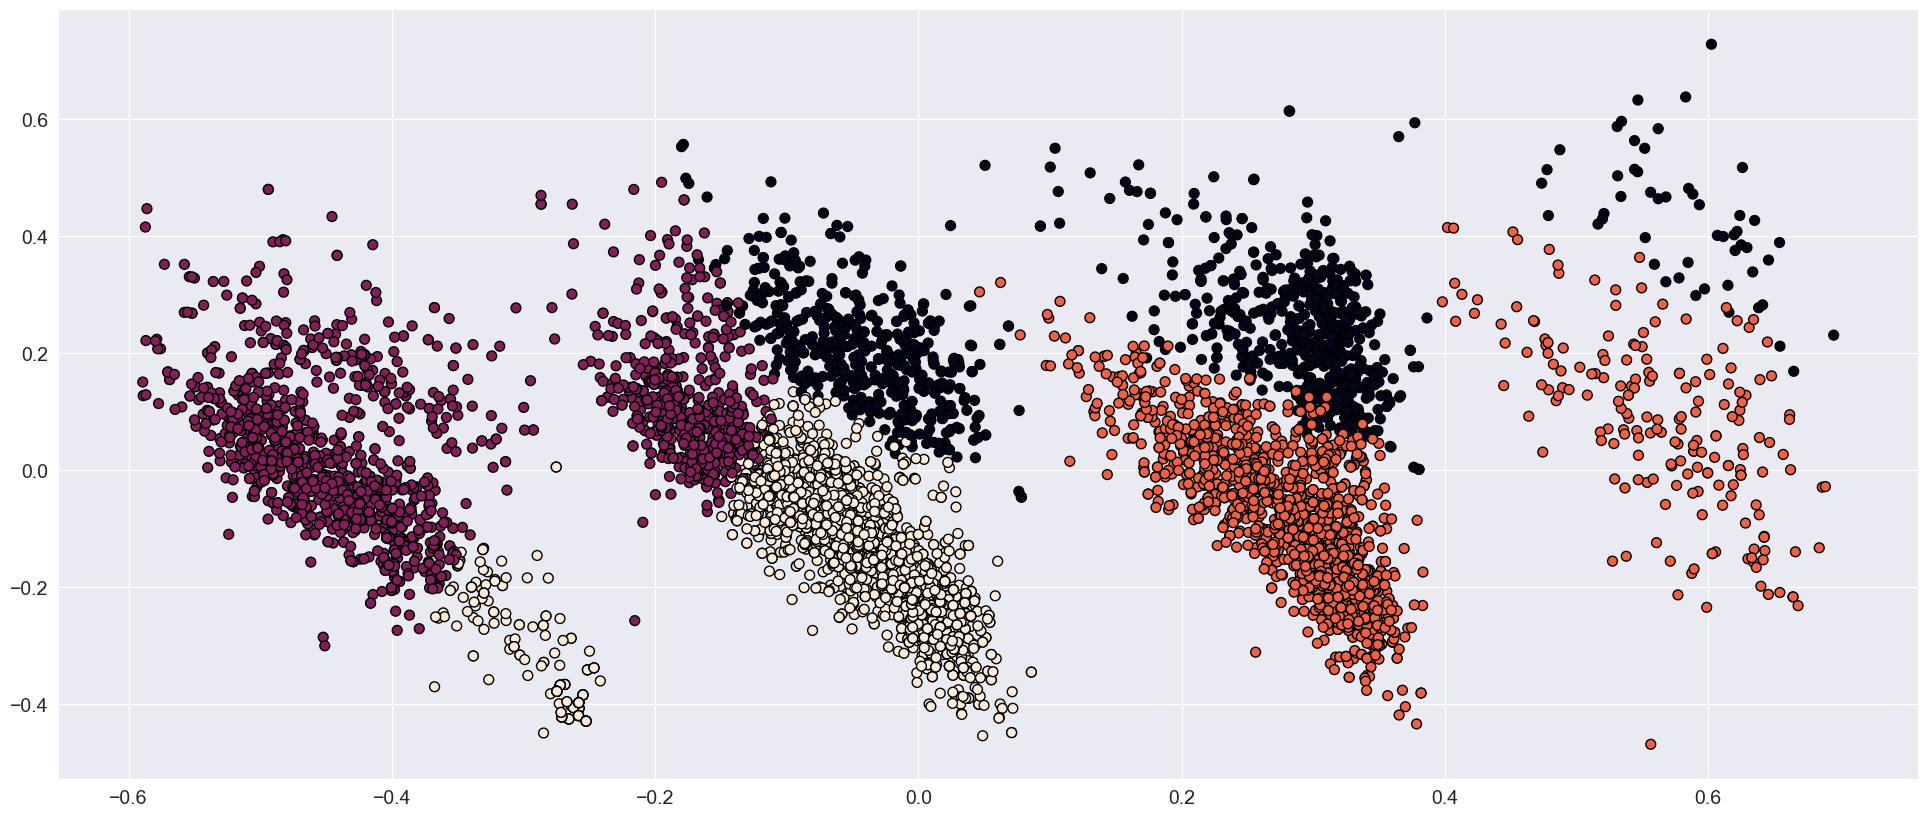

In [61]:

plot_scatter(feature_reduced, KMeans(n_clusters=number_clusters, random_state=42).fit_predict(feature_norm))

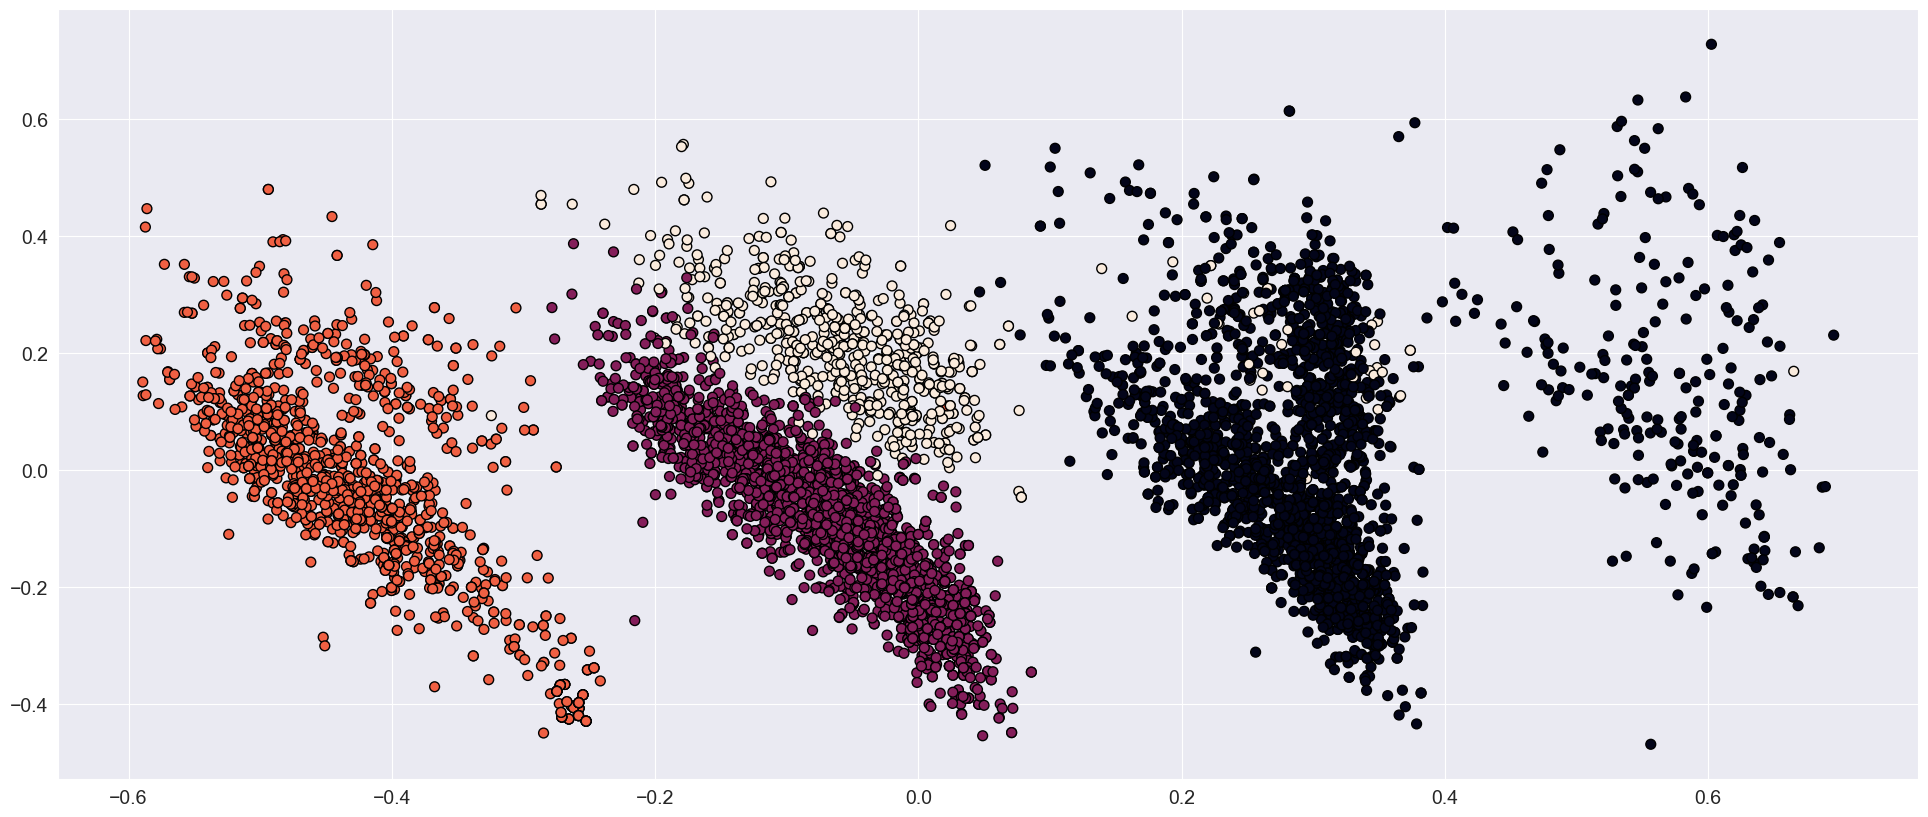

In [62]:
plot_scatter(feature_reduced, Birch(n_clusters=number_clusters, threshold=0.1).fit_predict(feature_norm))

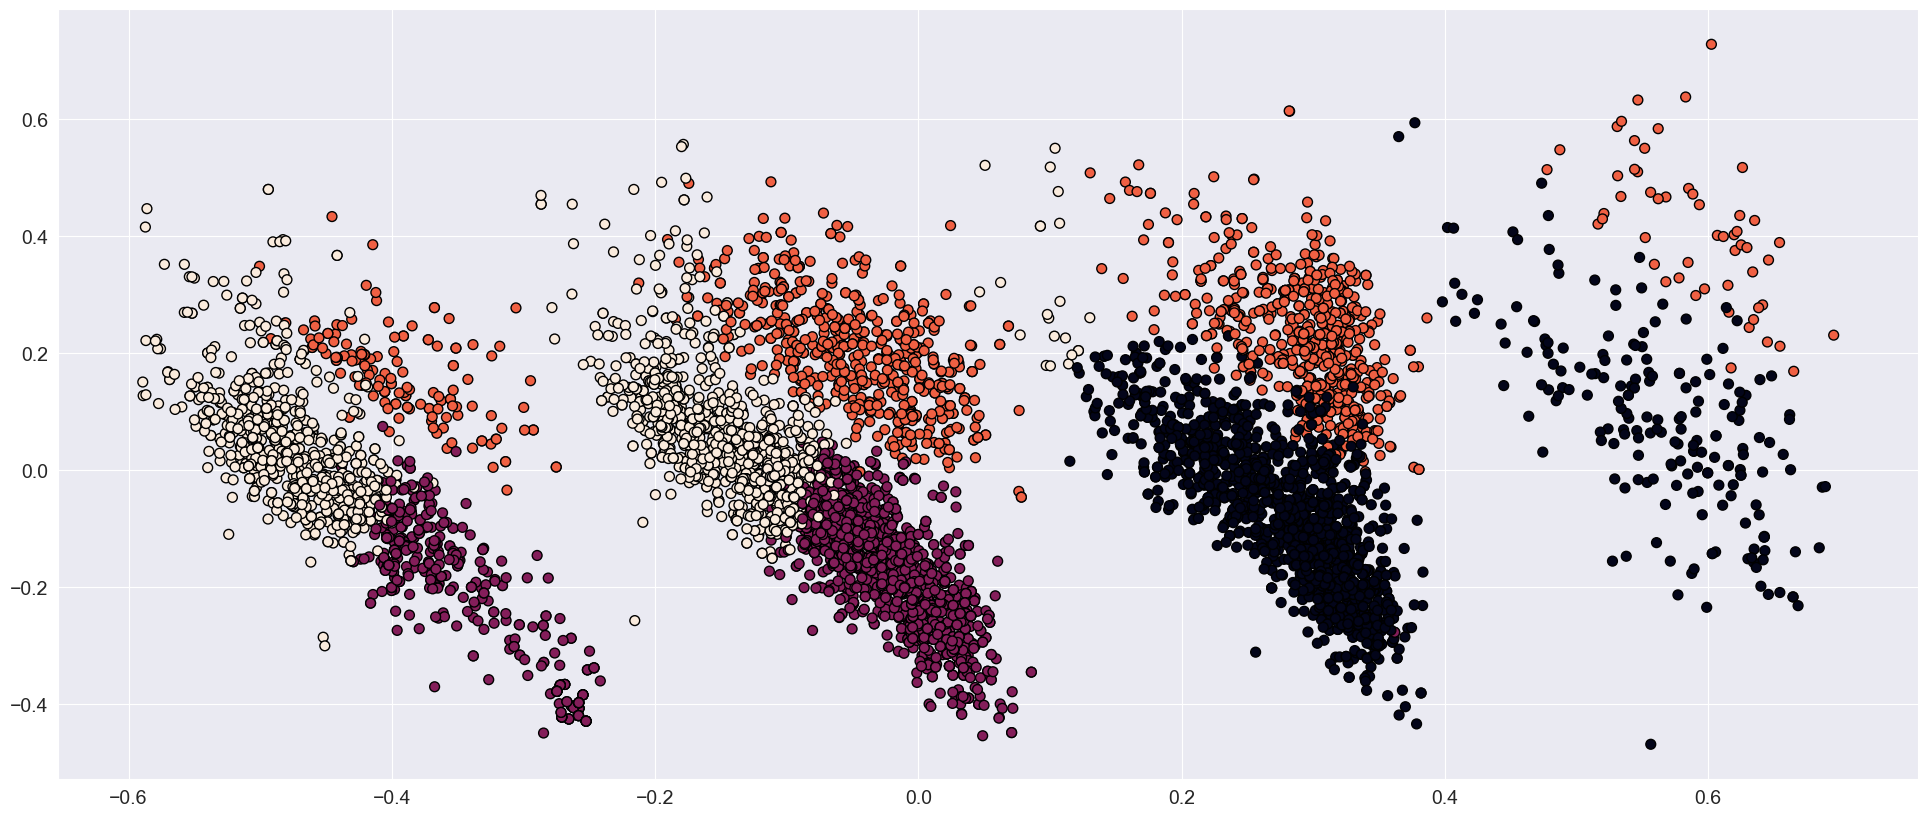

In [63]:
plot_scatter(feature_reduced, SpectralClustering(n_clusters=number_clusters).fit_predict(feature_norm))

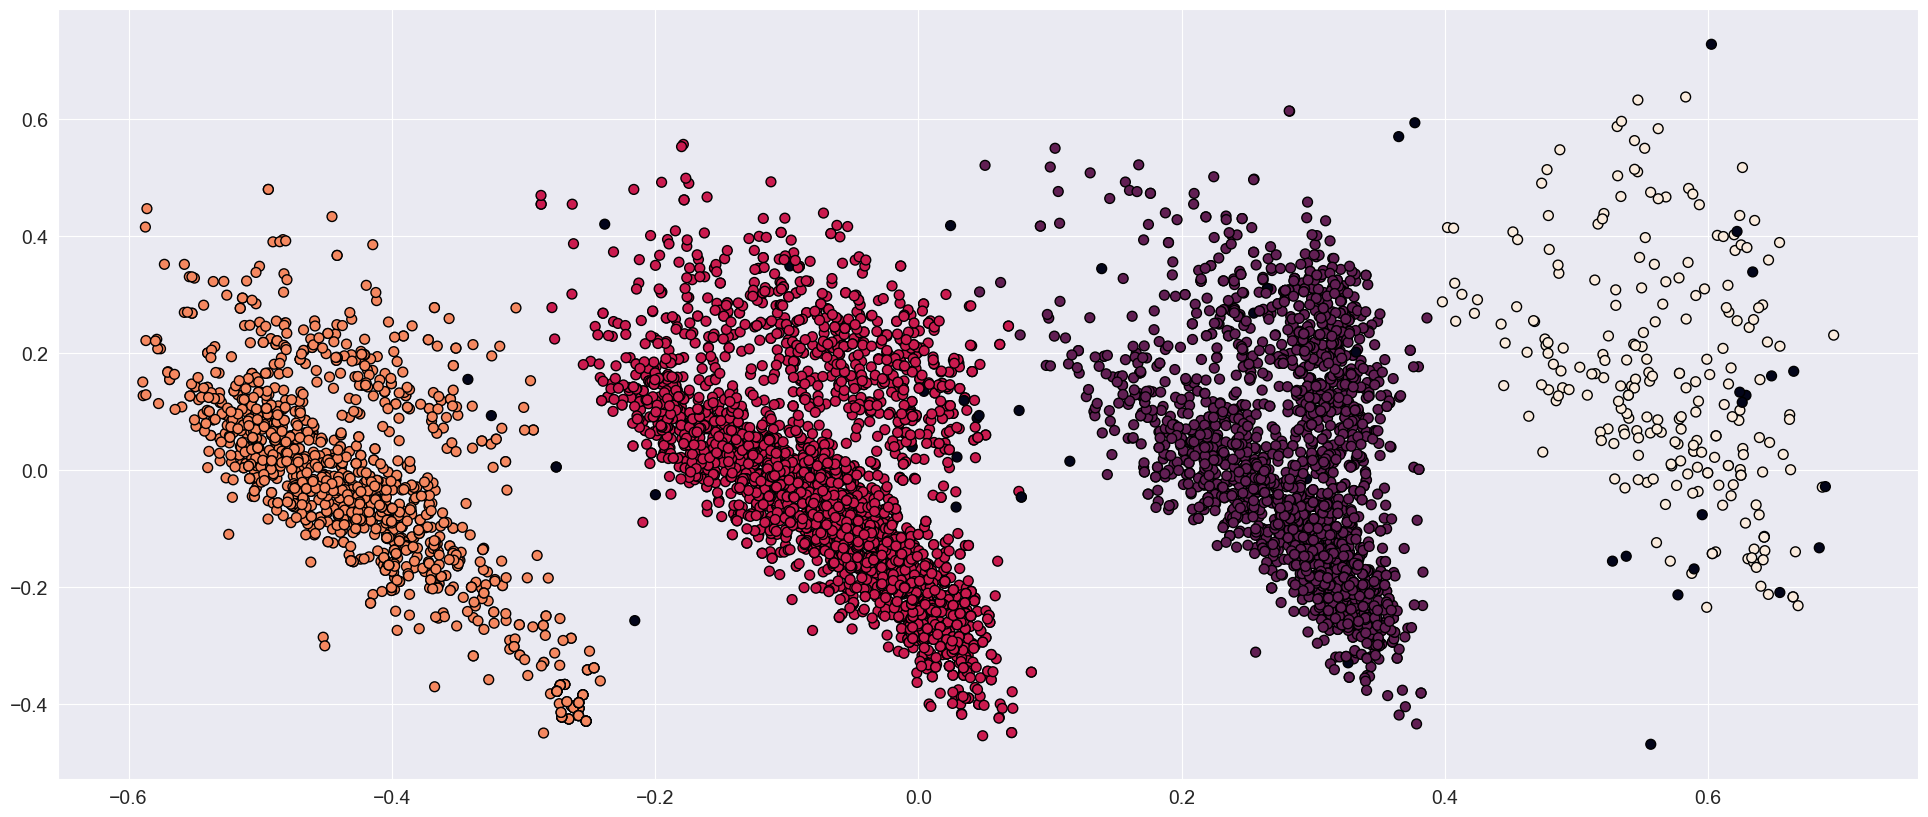

In [18]:
plot_scatter(feature_reduced, DBSCAN(eps=0.3).fit_predict(feature_norm))

In [19]:
inner = []
outer = []

for clusters in range(2, 10):
    predicted = KMeans(n_clusters=clusters, random_state=42).fit_predict(feature_norm)
    inner.append(davies_bouldin_score(feature_norm, predicted))
    outer.append(adjusted_rand_score(target, predicted))

In [20]:
def plot_metrics(inner, outer, clusters):
    plt.subplot(1, 2, 1)
    plt.plot(clusters, inner)
    plt.title("inner")
    plt.subplot(1, 2, 2)
    plt.plot(clusters, outer)
    plt.title("outer")
    plt.show()

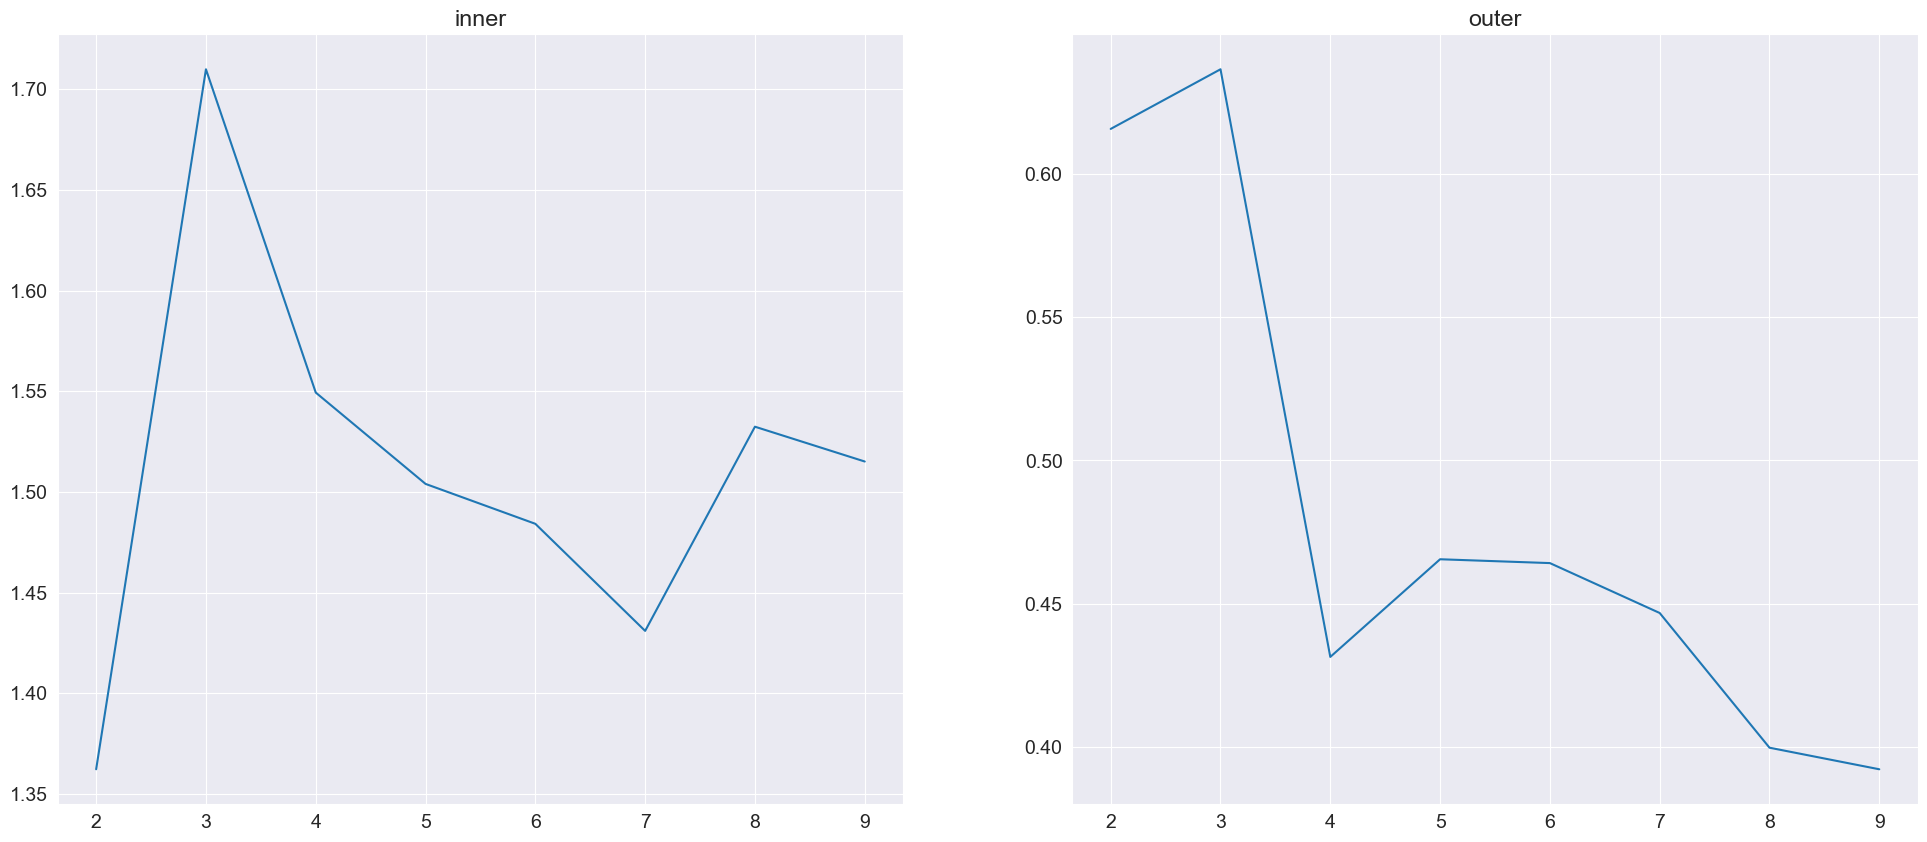

In [21]:
plot_metrics(inner, outer, range(2, 10))

In [22]:
eps_range = np.linspace(0.05, 0.35, num=10)

In [23]:
inner = []
outer = []

for eps in eps_range:
    predicted = DBSCAN(eps=eps).fit_predict(feature_norm)
    print(len(set(predicted)))
    inner.append(davies_bouldin_score(feature_norm, predicted))
    outer.append(adjusted_rand_score(target, predicted))

42
112
75
25
10
7
6
5
5
2


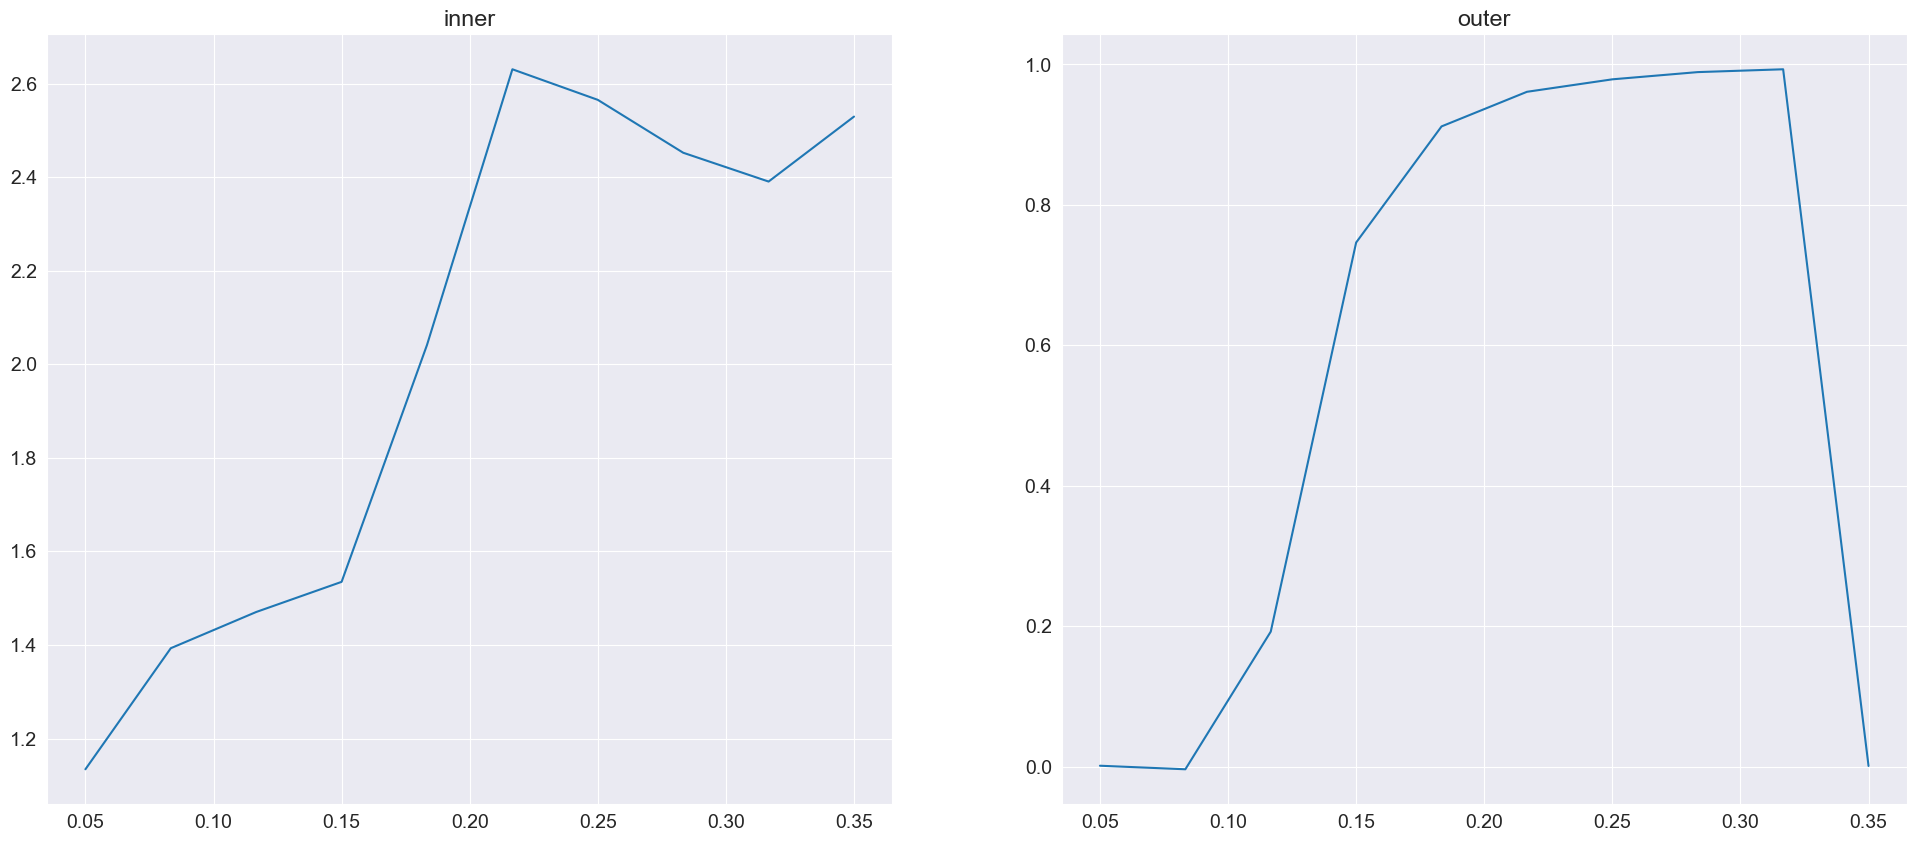

In [24]:
plot_metrics(inner, outer, eps_range)